# <center> Predicting NHL Players Points Capstone Notebook  
### <center> Adam Brenner

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# A Pickle file was created from the API process, which took approximately 45 minutes to execute on my machine.
# A work notebook showing the process of getting to model building and evaluation has also been attached

final_data = pd.read_pickle("./final_data.pkl")

In [3]:
# Creating a features and target variable set
features = final_data.drop(columns = ['20172018_total_points'])
target = final_data['20172018_total_points'].values

features = features.reset_index().drop(columns = ['index'])

In [4]:
# With some data distributions investigation, it seemed the following columns reacted well to a square root transformation
for c in features.columns[5:48]:
    if c.find('_plus_minus') == -1:
        features[c] = np.sqrt(features[c])
        
target = np.sqrt(target)

In [5]:
# Scaling to between 0 and 1 as there were large value discrepancies
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(np.array(target).reshape(-1,1))

Text(0.5, 1.0, 'Target Distribution')

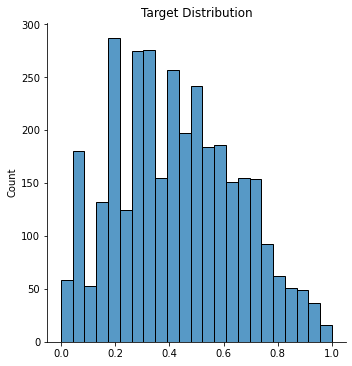

In [6]:
# Distribution of target variable
sns.displot(target_scaled, legend = False)
plt.title('Target Distribution')

In [7]:
# Splitting into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=.3)

In [8]:
# Creating base models
lin_reg = LinearRegression()
ridge_reg = Ridge()
dec_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [9]:
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

In [10]:
# Unscaling and squaring predictions and y-test for model evaluation
lin_pred = np.square(scaler.inverse_transform(lin_pred))
y_test_revert = np.square(scaler.inverse_transform(y_test))

In [11]:
print("Coefficients: \n", lin_reg.intercept_)
print("Root Mean Squared Error: \n", np.sqrt(mean_squared_error(y_test_revert, lin_pred)))
print("Mean Absolute Error: \n", metrics.mean_absolute_error(y_test_revert, lin_pred))

Coefficients: 
 [-0.05778048]
Root Mean Squared Error: 
 0.9755379353008442
Mean Absolute Error: 
 0.646342666209566


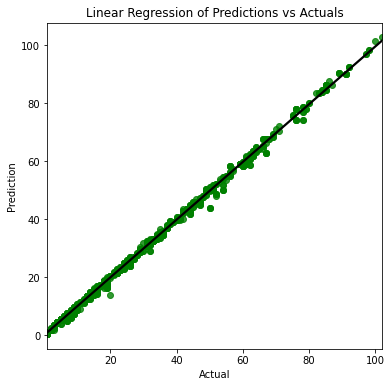

In [12]:
# Regression Line
plt.figure(figsize=(6,6))
sns.regplot(x = y_test_revert[:, 0], y = lin_pred[:, 0], scatter_kws = {'color': 'green'}, line_kws = {'color': 'black'})
plt.title('Linear Regression of Predictions vs Actuals')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

Text(0.5, 1.0, 'Residuals of Linear Regression Model')

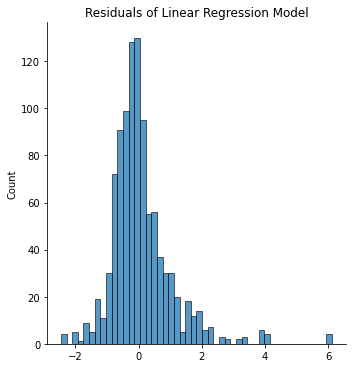

In [13]:
sns.displot(y_test_revert - lin_pred, legend = False)
plt.title('Residuals of Linear Regression Model')

In [14]:
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [15]:
# Unscaling for model evaluation
ridge_pred = np.square(scaler.inverse_transform(ridge_pred))
y_test_revert = np.square(scaler.inverse_transform(y_test))

In [16]:
print("Intercept: \n", ridge_reg.intercept_)
print("Root Mean Squared Error: \n", np.sqrt(mean_squared_error(y_test_revert, ridge_pred)))
print("Mean Absolute Error: \n", metrics.mean_absolute_error(y_test_revert, ridge_pred))

Intercept: 
 [-0.07031525]
Root Mean Squared Error: 
 1.1405456613010567
Mean Absolute Error: 
 0.7851620218801609


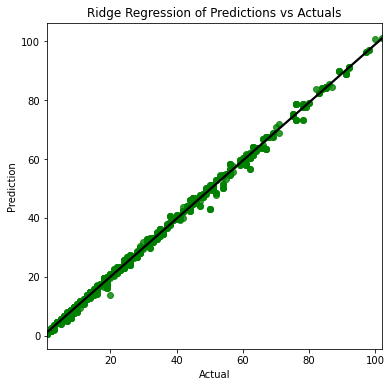

In [17]:
plt.figure(figsize=(6,6))
sns.regplot(x = y_test_revert[:, 0], y = ridge_pred[:, 0], scatter_kws = {'color': 'green'}, line_kws = {'color': 'black'})
plt.title('Ridge Regression of Predictions vs Actuals')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

Text(0.5, 1.0, 'Residuals of Ridge Regression Model')

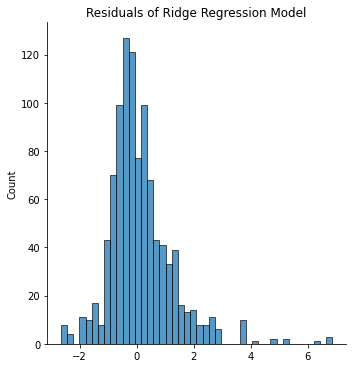

In [18]:
sns.displot(y_test_revert - ridge_pred, legend = False)
plt.title('Residuals of Ridge Regression Model')

In [19]:
# Creating another feature and target set, however this time no transformation or scaling will take place
features = final_data.drop(columns = ['20172018_total_points'])
target = final_data['20172018_total_points'].values

features = features.reset_index().drop(columns = ['index'])

In [20]:
# Training and testing set on unscaled data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3)

In [21]:
# Fitting Decision Tree Regressor created above
dec_reg.fit(X_train, y_train)
dec_pred = dec_reg.predict(X_test)

In [22]:
# Checking for overfitting
dec_reg.score(X_train, y_train)

1.0

In [23]:
dec_reg.score(X_test, y_test)

1.0

In [24]:
print("Mean Absolute Error: \n", metrics.mean_absolute_error(y_test, dec_pred))
print("Root Mean Squared Error: \n", np.sqrt(mean_squared_error(y_test, dec_pred)))

Mean Absolute Error: 
 0.0
Root Mean Squared Error: 
 0.0


In [25]:
tree_depth = [i for i in range(1, 30)]

In [26]:
# Creating different models with tree depths from the list above. Recording the MAE, RMSE scores and putting them into
# lists for plotting.
train_scores = []
test_scores = []
train_rmse_scores = []
test_rmse_scores = []
for i in tree_depth:
    model = DecisionTreeRegressor(max_depth=i)
    
    model.fit(X_train, y_train)
    
    train_y = model.predict(X_train)
    train_mae = metrics.mean_absolute_error(y_train, train_y)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_y))
    train_scores.append(train_mae)
    train_rmse_scores.append(train_rmse)
    
    test_y = model.predict(X_test)
    test_mae = metrics.mean_absolute_error(y_test, test_y)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_y))
    test_scores.append(test_mae)
    test_rmse_scores.append(test_rmse)
    
    # Uncomment to see each depth score output
    #print('>%d, train: %.3f, test: %.3f' % (i, train_rmse, test_rmse))

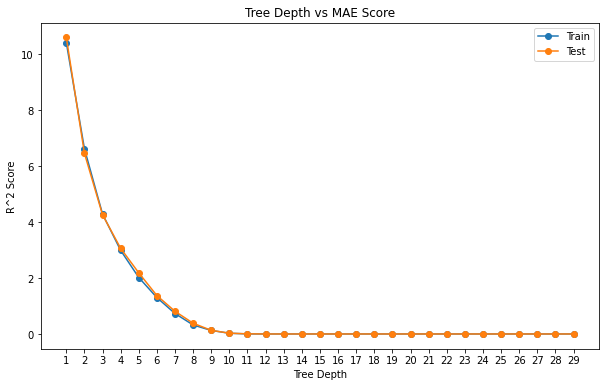

In [27]:
plt.figure(figsize=(10,6))
plt.plot(tree_depth, train_scores, '-o', label='Train')
plt.plot(tree_depth, test_scores, '-o', label='Test')
plt.legend()
plt.title('Tree Depth vs MAE Score')
plt.xlabel('Tree Depth')
plt.ylabel('R^2 Score')
plt.xticks(tree_depth)
plt.show()

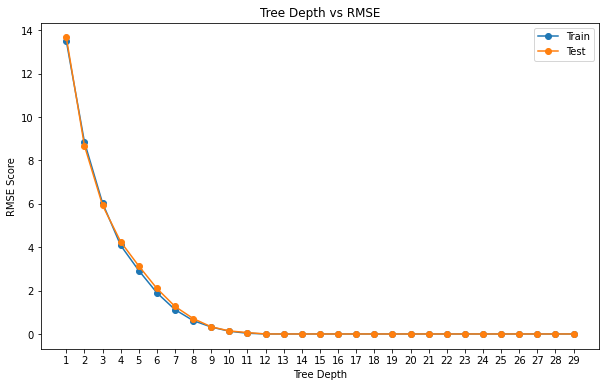

In [28]:
plt.figure(figsize=(10,6))
plt.plot(tree_depth, train_rmse_scores, '-o', label='Train')
plt.plot(tree_depth, test_rmse_scores, '-o', label='Test')
plt.legend()
plt.title('Tree Depth vs RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE Score')
plt.xticks(tree_depth)
plt.show()

In [29]:
# Tuning a decision tree model based on the tree depth from above
dec_reg_tuned = DecisionTreeRegressor(max_depth=3)
dec_reg_tuned.fit(X_train, y_train)
dec_reg_tuned_pred = dec_reg_tuned.predict(X_test)

In [30]:
# Less overfitting while maintaing accurate predictions
print(dec_reg_tuned.score(X_train, y_train))
print(dec_reg_tuned.score(X_test, y_test))
print("Mean Absolute Error: \n", metrics.mean_absolute_error(y_test, dec_reg_tuned_pred))
print("Root Mean Squared Error: \n", np.sqrt(mean_squared_error(y_test, dec_reg_tuned_pred)))

0.929547413110607
0.9298887255923451
Mean Absolute Error: 
 4.255526326650287
Root Mean Squared Error: 
 5.932223938818268


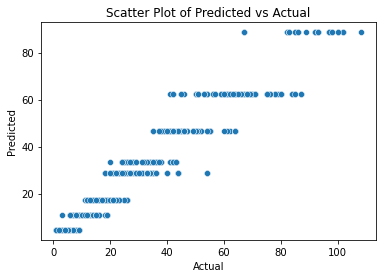

In [31]:
sns.scatterplot(x = y_test, y = dec_reg_tuned_pred)
plt.title('Scatter Plot of Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0.5, 1.0, 'Residual Plot of Decision Tree')

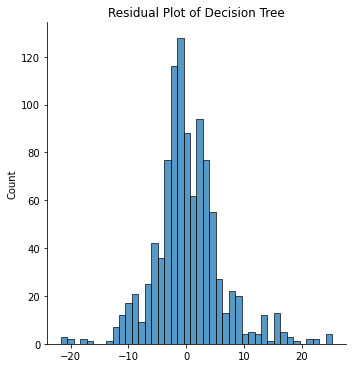

In [32]:
sns.displot(y_test - dec_reg_tuned_pred)
plt.title('Residual Plot of Decision Tree')

In [33]:
# Fitting Random Forest model created above
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

In [34]:
# Again overfitting clearly present
rf_reg.score(X_train, y_train)

0.9999779151808219

In [35]:
rf_reg.score(X_test, y_test)

0.9999261691939163

In [36]:
# Using the max depths values created from the list earlier. Training and predicting different random forest models
# with varying depths and recording the MAE and RMSE scores.
train_scores = []
test_scores = []
train_rmse_scores = []
test_rmse_scores = []
for i in tree_depth:
    model = RandomForestRegressor(max_depth=i)
    
    model.fit(X_train, y_train)
    
    train_y = model.predict(X_train)
    train_mae = metrics.mean_absolute_error(y_train, train_y)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_y))
    train_scores.append(train_mae)
    train_rmse_scores.append(train_rmse)
    
    test_y = model.predict(X_test)
    test_mae = metrics.mean_absolute_error(y_test, test_y)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_y))
    test_scores.append(test_mae)
    test_rmse_scores.append(test_rmse)
    
    # Uncomment to see each depth score output
    # print('>%d, train: %.3f, test: %.3f' % (i, train_rmse, test_rmse))

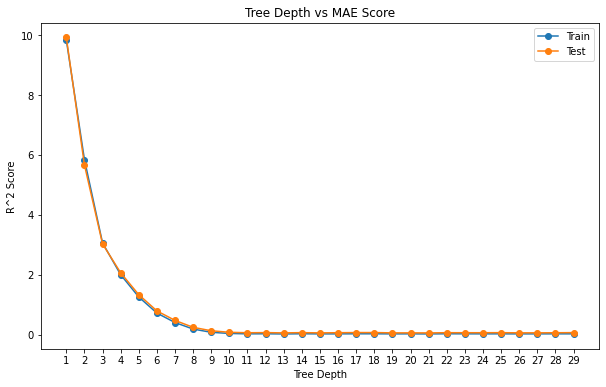

In [37]:
plt.figure(figsize=(10,6))
plt.plot(tree_depth, train_scores, '-o', label='Train')
plt.plot(tree_depth, test_scores, '-o', label='Test')
plt.legend()
plt.title('Tree Depth vs MAE Score')
plt.xlabel('Tree Depth')
plt.ylabel('R^2 Score')
plt.xticks(tree_depth)
plt.show()

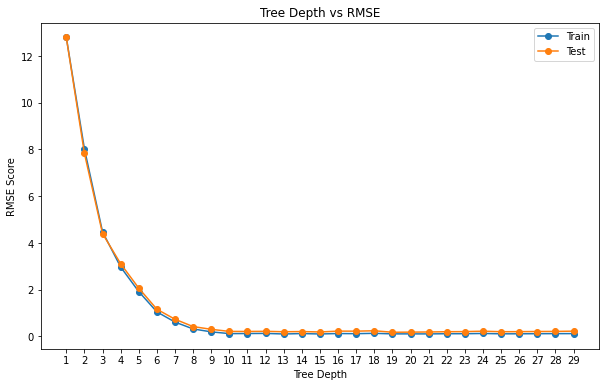

In [38]:
plt.figure(figsize=(10,6))
plt.plot(tree_depth, train_rmse_scores, '-o', label='Train')
plt.plot(tree_depth, test_rmse_scores, '-o', label='Test')
plt.legend()
plt.title('Tree Depth vs RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE Score')
plt.xticks(tree_depth)
plt.show()

In [39]:
# Tuning the random forest model using the graphs above
rf_reg_tuned = RandomForestRegressor(max_depth=3)
rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned_pred = rf_reg_tuned.predict(X_test)

In [40]:
# Less overfitting while maintaining accurate predictions
print(rf_reg_tuned.score(X_train, y_train))
print(rf_reg_tuned.score(X_test, y_test))
print("Mean Absolute Error: \n", metrics.mean_absolute_error(y_test, rf_reg_tuned_pred))
print("Root Mean Squared Error: \n", np.sqrt(mean_squared_error(y_test, rf_reg_tuned_pred)))

0.9622773709249091
0.9626609776414496
Mean Absolute Error: 
 2.974607299302612
Root Mean Squared Error: 
 4.329174361511972


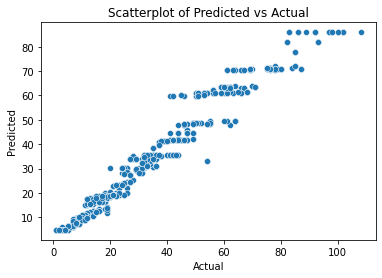

In [41]:
sns.scatterplot(x = y_test, y = rf_reg_tuned_pred)
plt.title('Scatterplot of Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

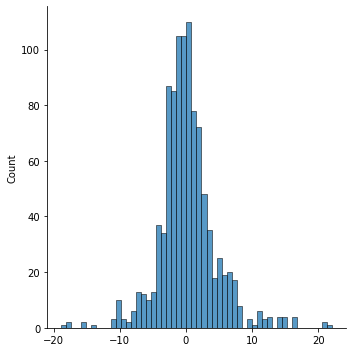

In [42]:
sns.displot(y_test - rf_reg_tuned_pred)

All in all, each of the four models showed promising predictions. However, the linear and ridge models had to be trained and fitted on scaled and transformed data, which required looking at data distributions for all variables. The decision tree and random forest models could be trained and fitted on unscaled data, but are always prone to overfitting and thus had to be tuned. For future endeavors, either the decision tree or random forest model would be best.